In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_lego as mplego

from functools import partial
from pyprojroot import here
from mpl_lego.labels import bold_text, add_significance_label
from scipy.stats import bootstrap, mannwhitneyu

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [3]:
df1 = pd.read_csv(here('data/aita_w_gpt_w_mfd.csv'))

In [4]:
df2 = pd.read_csv(here('data/aita_final_no_mfd.csv'))

In [5]:
df = df2.merge(df1[['submission_id',
              'care_p',
              'fairness_p',
              'loyalty_p',
              'authority_p',
              'sanctity_p',
              'care_sent',
              'fairness_sent',
              'loyalty_sent',
              'authority_sent',
              'sanctity_sent',
              'moral_nonmoral_ratio',
              'f_var',
              'sent_var']],
          on='submission_id',
          how='left')

In [38]:
df.to_csv('../data/aita_final.csv', index=False)

In [6]:
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO']
n_labels = len(labels)

In [7]:
df.groupby('gpt_label_1')[['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 'f_var']].mean()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,f_var
gpt_label_1,,,,,,
ESH,0.106824,0.097340,0.095187,0.087176,0.087252,0.000108
INFO,0.105624,0.097458,0.095918,0.086511,0.086540,0.000111
NAH,0.107271,0.098788,0.096174,0.087502,0.088199,0.000125
NTA,0.107380,0.098048,0.095884,0.087842,0.087916,0.000109
YTA,0.106164,0.096961,0.095348,0.086695,0.086855,0.000112


In [8]:
df.groupby('true_label')[['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']].mean()

,care_p,fairness_p,loyalty_p,authority_p,sanctity_p
true_label,,,,,
ESH,0.106689,0.096861,0.095469,0.087342,0.087530
INFO,0.106991,0.098874,0.096141,0.087754,0.088077
NAH,0.106087,0.096261,0.095123,0.085840,0.087296
NTA,0.107143,0.097965,0.095695,0.087583,0.087595
YTA,0.105912,0.096170,0.095438,0.086611,0.086910


In [9]:
gpt_yta = df[(df['gpt_label_1'] == 'YTA')]
hum_yta = df[(df['true_label'] == 'YTA')]
gpt_yta_hum_not_yta = df[(df['gpt_label_2'] == 'YTA') & (df['true_label'] != 'YTA')]
gpt_not_yta_hum_yta = df[(df['gpt_label_2'] != 'YTA') & (df['true_label'] == 'YTA')]

In [33]:
yta2yta = df[(df['true_label'] == 'YTA') & (df['gpt_label_3'] == 'YTA')]
yta2nta = df[(df['true_label'] == 'YTA') & (df['gpt_label_3'] == 'NTA')]
nta2yta = df[(df['true_label'] != 'YTA') & (df['gpt_label_3'] == 'YTA')]
nta2nta = df[(df['true_label'] == 'NTA') & (df['gpt_label_3'] == 'NTA')]

In [36]:
yta2nta.shape

(291, 36)

In [35]:
yta2yta.shape

(1259, 36)

In [37]:
nta2yta.shape

(1797, 36)

In [38]:
nta2nta.shape

(5435, 36)

In [11]:
probs = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p']
labels = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']

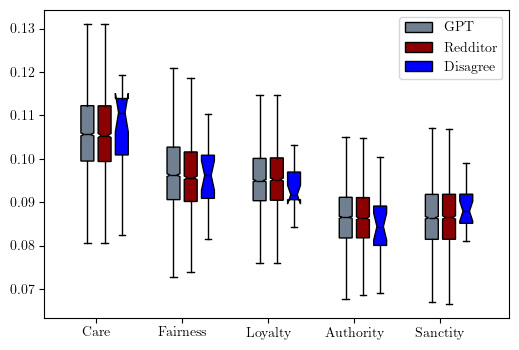

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

bp1 = ax.boxplot([gpt_yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.4 for idx in range(5)],
           boxprops={'facecolor': 'slategrey'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
bp2 = ax.boxplot([hum_yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.6 for idx in range(5)],
           boxprops={'facecolor': 'darkred'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

bp3 = ax.boxplot([gpt_yta_hum_not_yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.8 for idx in range(5)],
           boxprops={'facecolor': 'blue'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)

ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(labels)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
          ['GPT', 'Redditor', 'Disagree'], loc='upper right')

In [31]:
[np.median(hum_yta[prob]) - np.median(gpt_yta_hum_not_yta[prob]) for prob in probs]

[-0.005268063205634346,
 -0.0005399788141275536,
 0.0034790744915637606,
 0.0019391072357327482,
 -0.0014253849517594508]

In [32]:
[mannwhitneyu(hum_yta[prob], gpt_yta_hum_not_yta[prob]) for prob in probs]

[MannwhitneyuResult(statistic=16917.0, pvalue=0.319166126158148),
 MannwhitneyuResult(statistic=18995.0, pvalue=0.8812738138465063),
 MannwhitneyuResult(statistic=22891.0, pvalue=0.15045666500570778),
 MannwhitneyuResult(statistic=21578.0, pvalue=0.366604572807267),
 MannwhitneyuResult(statistic=16897.0, pvalue=0.31522282674958846)]

In [33]:
[mannwhitneyu(yta2yta[prob], yta2nta[prob]) for prob in probs]

[MannwhitneyuResult(statistic=163161.0, pvalue=0.0036172699876635852),
 MannwhitneyuResult(statistic=162773.0, pvalue=0.0030157656360914457),
 MannwhitneyuResult(statistic=182061.0, pvalue=0.8703654140317051),
 MannwhitneyuResult(statistic=171450.0, pvalue=0.08815996706329828),
 MannwhitneyuResult(statistic=167717.0, pvalue=0.02459760326494545)]

<Axes: >

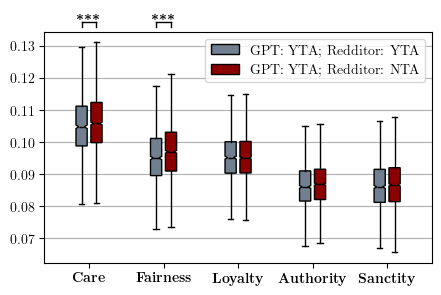

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

bp1 = ax.boxplot([yta2yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.4 for idx in range(5)],
           boxprops={'facecolor': 'slategrey'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
bp2 = ax.boxplot([nta2yta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.6 for idx in range(5)],
           boxprops={'facecolor': 'darkred'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
    
ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(bold_text(labels))
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          ['GPT: YTA; Redditor: YTA', 'GPT: YTA; Redditor: NTA'], loc='upper right')
ax.grid(axis='y')
ax.set_axisbelow(True)
add_significance_label(ax,
                       bounds=[0.4, 0.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)
add_significance_label(ax,
                       bounds=[1.4, 1.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)

<Axes: >

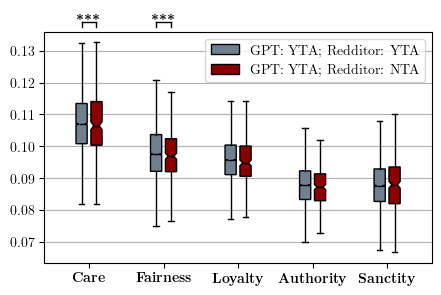

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

bp1 = ax.boxplot([nta2nta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.4 for idx in range(5)],
           boxprops={'facecolor': 'slategrey'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
bp2 = ax.boxplot([yta2nta[prob] for prob in probs],
           patch_artist=True,
           notch=True,
           widths=0.15,
           positions=[idx + 0.6 for idx in range(5)],
           boxprops={'facecolor': 'darkred'},
           medianprops={'linewidth': 1, 'color': 'black'},
           showfliers=False)
    
ax.set_xticks(0.5 + np.arange(5))
ax.set_xticklabels(bold_text(labels))
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          ['GPT: YTA; Redditor: YTA', 'GPT: YTA; Redditor: NTA'], loc='upper right')
ax.grid(axis='y')
ax.set_axisbelow(True)
add_significance_label(ax,
                       bounds=[0.4, 0.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)
add_significance_label(ax,
                       bounds=[1.4, 1.6],
                       label=bold_text('***'),
                       spacing=0.02,
                       fontsize=10,
                       width=0.025)

In [30]:
[mannwhitneyu(yta2nta[prob], nta2nta[prob]) for prob in probs]

[MannwhitneyuResult(statistic=780580.0, pvalue=0.7101168573342374),
 MannwhitneyuResult(statistic=744238.0, pvalue=0.09017313276736053),
 MannwhitneyuResult(statistic=758233.0, pvalue=0.23598133907202434),
 MannwhitneyuResult(statistic=747466.0, pvalue=0.11479747617839216),
 MannwhitneyuResult(statistic=784630.0, pvalue=0.8225346521429722)]

In [35]:
[mannwhitneyu(yta2yta[prob], nta2yta[prob]) for prob in probs]

[MannwhitneyuResult(statistic=1243526.0, pvalue=0.002396847523373521),
 MannwhitneyuResult(statistic=1179346.0, pvalue=7.103383299467168e-08),
 MannwhitneyuResult(statistic=1317916.0, pvalue=0.7570464917965758),
 MannwhitneyuResult(statistic=1269529.0, pvalue=0.03725586165413692),
 MannwhitneyuResult(statistic=1289381.0, pvalue=0.1753252983207293)]

In [14]:
[yta2yta[prob].mean() - yta2nta[prob].mean() for prob in probs]

[-0.0019546382249479577,
 -0.0011610624226033178,
 0.00012299750786716468,
 -0.0002767090841676867,
 -0.0009865661503763723]

In [40]:
[yta2yta[prob].median() - nta2yta[prob].median() for prob in probs]

[-0.0011606699458300007,
 -0.0020072183560318063,
 -4.056465507801255e-06,
 -0.0009766492112200098,
 -0.0006842457159550036]